In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(1755.6847)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 644.83899  validloss 918.06659±0.00000  bestvalidloss 918.06659  last_update 0
train: iter 1  trainloss 210.76613  validloss 567.49333±0.00000  bestvalidloss 567.49333  last_update 0
train: iter 2  trainloss -15.76951  validloss 332.83773±0.00000  bestvalidloss 332.83773  last_update 0
train: iter 3  trainloss -373.80603  validloss -183.93672±0.00000  bestvalidloss -183.93672  last_update 0
train: iter 4  trainloss -561.17897  validloss -372.32037±0.00000  bestvalidloss -372.32037  last_update 0
train: iter 5  trainloss -667.97685  validloss -534.59201±0.00000  bestvalidloss -534.59201  last_update 0
train: iter 6  trainloss -740.27102  validloss -578.61188±0.00000  bestvalidloss -578.61188  last_update 0
train: iter 7  trainloss -814.38953  validloss -614.98794±0.00000  bestvalidloss -614.98794  last_update 0
train: iter 8  trainloss -824.69510  validloss -753.59732±0.00000  bestvalidloss -753.59732  last_update 0
train: iter 9  trainloss -9

train: iter 75  trainloss -1691.21839  validloss -1368.58539±0.00000  bestvalidloss -1463.89630  last_update 12
train: iter 76  trainloss -1641.69836  validloss -1295.26378±0.00000  bestvalidloss -1463.89630  last_update 13
train: iter 77  trainloss -1702.17180  validloss -1464.33503±0.00000  bestvalidloss -1464.33503  last_update 0
train: iter 78  trainloss -1707.44818  validloss -1496.89510±0.00000  bestvalidloss -1496.89510  last_update 0
train: iter 79  trainloss -1720.26110  validloss -1522.61962±0.00000  bestvalidloss -1522.61962  last_update 0
train: iter 80  trainloss -1720.45941  validloss -1451.67523±0.00000  bestvalidloss -1522.61962  last_update 1
train: iter 81  trainloss -1723.66792  validloss -1409.84038±0.00000  bestvalidloss -1522.61962  last_update 2
train: iter 82  trainloss -1680.01546  validloss -1505.46593±0.00000  bestvalidloss -1522.61962  last_update 3
train: iter 83  trainloss -1753.49328  validloss -1548.85892±0.00000  bestvalidloss -1548.85892  last_update 0

train: iter 149  trainloss -1907.30765  validloss -1647.55800±0.00000  bestvalidloss -1708.30377  last_update 6
train: iter 150  trainloss -1982.48886  validloss -1603.77586±0.00000  bestvalidloss -1708.30377  last_update 7
train: iter 151  trainloss -1947.29486  validloss -1657.92908±0.00000  bestvalidloss -1708.30377  last_update 8
train: iter 152  trainloss -1979.97981  validloss -1618.87960±0.00000  bestvalidloss -1708.30377  last_update 9
train: iter 153  trainloss -1963.63572  validloss -1731.79442±0.00000  bestvalidloss -1731.79442  last_update 0
train: iter 154  trainloss -1982.56985  validloss -1681.39502±0.00000  bestvalidloss -1731.79442  last_update 1
train: iter 155  trainloss -1982.69956  validloss -1727.17161±0.00000  bestvalidloss -1731.79442  last_update 2
train: iter 156  trainloss -1975.67164  validloss -1689.96225±0.00000  bestvalidloss -1731.79442  last_update 3
train: iter 157  trainloss -1994.89955  validloss -1637.86611±0.00000  bestvalidloss -1731.79442  last_u

train: iter 223  trainloss -2013.40259  validloss -1801.30527±0.00000  bestvalidloss -1849.61802  last_update 10
train: iter 224  trainloss -1968.35074  validloss -1659.76085±0.00000  bestvalidloss -1849.61802  last_update 11
train: iter 225  trainloss -2047.83895  validloss -1849.10380±0.00000  bestvalidloss -1849.61802  last_update 12
train: iter 226  trainloss -2001.69892  validloss -1789.61177±0.00000  bestvalidloss -1849.61802  last_update 13
train: iter 227  trainloss -2024.85898  validloss -1836.35016±0.00000  bestvalidloss -1849.61802  last_update 14
train: iter 228  trainloss -2039.18457  validloss -1759.70344±0.00000  bestvalidloss -1849.61802  last_update 15
train: iter 229  trainloss -2042.10115  validloss -1783.05242±0.00000  bestvalidloss -1849.61802  last_update 16
train: iter 230  trainloss -2046.27014  validloss -1868.19142±0.00000  bestvalidloss -1868.19142  last_update 0
train: iter 231  trainloss -2039.95170  validloss -1782.24736±0.00000  bestvalidloss -1868.19142 

train: iter 296  trainloss -2079.60911  validloss -1872.68477±0.00000  bestvalidloss -1931.72602  last_update 1
train: iter 297  trainloss -2055.49340  validloss -1890.34636±0.00000  bestvalidloss -1931.72602  last_update 2
train: iter 298  trainloss -2030.31448  validloss -1830.48787±0.00000  bestvalidloss -1931.72602  last_update 3
train: iter 299  trainloss -2025.57617  validloss -1908.31396±0.00000  bestvalidloss -1931.72602  last_update 4
train: iter 300  trainloss -2043.68853  validloss -1874.28888±0.00000  bestvalidloss -1931.72602  last_update 5
train: iter 301  trainloss -2079.39541  validloss -1912.26583±0.00000  bestvalidloss -1931.72602  last_update 6
train: iter 302  trainloss -2068.28329  validloss -1900.35543±0.00000  bestvalidloss -1931.72602  last_update 7
train: iter 303  trainloss -2080.15102  validloss -1887.34265±0.00000  bestvalidloss -1931.72602  last_update 8
train: iter 304  trainloss -2085.97267  validloss -1892.88532±0.00000  bestvalidloss -1931.72602  last_u

train: iter 369  trainloss -2077.34131  validloss -1954.79042±0.00000  bestvalidloss -1971.05059  last_update 6
train: iter 370  trainloss -2076.15350  validloss -1850.97345±0.00000  bestvalidloss -1971.05059  last_update 7
train: iter 371  trainloss -2097.56250  validloss -1929.63522±0.00000  bestvalidloss -1971.05059  last_update 8
train: iter 372  trainloss -2096.22708  validloss -1911.42777±0.00000  bestvalidloss -1971.05059  last_update 9
train: iter 373  trainloss -1862.02768  validloss -1743.36571±0.00000  bestvalidloss -1971.05059  last_update 10
train: iter 374  trainloss -2045.21155  validloss -1636.62992±0.00000  bestvalidloss -1971.05059  last_update 11
train: iter 375  trainloss -2103.33569  validloss -1892.81840±0.00000  bestvalidloss -1971.05059  last_update 12
train: iter 376  trainloss -2098.99404  validloss -1922.51117±0.00000  bestvalidloss -1971.05059  last_update 13
train: iter 377  trainloss -2095.59128  validloss -1955.66007±0.00000  bestvalidloss -1971.05059  la

train: iter 442  trainloss -2095.12511  validloss -1983.43298±0.00000  bestvalidloss -2016.19532  last_update 1
train: iter 443  trainloss -2121.64075  validloss -1984.53942±0.00000  bestvalidloss -2016.19532  last_update 2
train: iter 444  trainloss -2116.77093  validloss -1991.36818±0.00000  bestvalidloss -2016.19532  last_update 3
train: iter 445  trainloss -2104.81289  validloss -1970.51722±0.00000  bestvalidloss -2016.19532  last_update 4
train: iter 446  trainloss -2099.85991  validloss -1970.43383±0.00000  bestvalidloss -2016.19532  last_update 5
train: iter 447  trainloss -2112.82757  validloss -1992.95078±0.00000  bestvalidloss -2016.19532  last_update 6
train: iter 448  trainloss -2110.51509  validloss -1955.17617±0.00000  bestvalidloss -2016.19532  last_update 7
train: iter 449  trainloss -2106.71914  validloss -1913.08384±0.00000  bestvalidloss -2016.19532  last_update 8
train: iter 450  trainloss -2103.63819  validloss -1929.84637±0.00000  bestvalidloss -2016.19532  last_u

train: iter 516  trainloss -2115.83728  validloss -1989.08333±0.00000  bestvalidloss -2034.97523  last_update 4
train: iter 517  trainloss -2114.07775  validloss -2016.71940±0.00000  bestvalidloss -2034.97523  last_update 5
train: iter 518  trainloss -2107.84601  validloss -2007.35705±0.00000  bestvalidloss -2034.97523  last_update 6
train: iter 519  trainloss -2129.68251  validloss -2035.29883±0.00000  bestvalidloss -2035.29883  last_update 0
train: iter 520  trainloss -2108.83248  validloss -2004.49064±0.00000  bestvalidloss -2035.29883  last_update 1
train: iter 521  trainloss -2122.26054  validloss -1955.89626±0.00000  bestvalidloss -2035.29883  last_update 2
train: iter 522  trainloss -2100.14681  validloss -2010.31910±0.00000  bestvalidloss -2035.29883  last_update 3
train: iter 523  trainloss -2013.14221  validloss -2015.85083±0.00000  bestvalidloss -2035.29883  last_update 4
train: iter 524  trainloss -2095.43769  validloss -1935.44478±0.00000  bestvalidloss -2035.29883  last_u

train: iter 589  trainloss -2089.49310  validloss -1898.53723±0.00000  bestvalidloss -2053.56781  last_update 50
train: iter 590  trainloss -2131.55747  validloss -2030.11595±0.00000  bestvalidloss -2053.56781  last_update 51
train: iter 591  trainloss -2121.32598  validloss -2009.63397±0.00000  bestvalidloss -2053.56781  last_update 52
train: iter 592  trainloss -2120.80427  validloss -2024.13652±0.00000  bestvalidloss -2053.56781  last_update 53
train: iter 593  trainloss -2151.50146  validloss -2035.12371±0.00000  bestvalidloss -2053.56781  last_update 54
train: iter 594  trainloss -2155.26951  validloss -2057.38666±0.00000  bestvalidloss -2057.38666  last_update 0
train: iter 595  trainloss -2145.56961  validloss -2041.07909±0.00000  bestvalidloss -2057.38666  last_update 1
train: iter 596  trainloss -2118.77183  validloss -1998.81875±0.00000  bestvalidloss -2057.38666  last_update 2
train: iter 597  trainloss -2136.09333  validloss -1996.63437±0.00000  bestvalidloss -2057.38666  l

train: iter 662  trainloss -2138.30215  validloss -2022.70504±0.00000  bestvalidloss -2060.46586  last_update 54
train: iter 663  trainloss -2160.90389  validloss -2038.23311±0.00000  bestvalidloss -2060.46586  last_update 55
train: iter 664  trainloss -2162.80188  validloss -2034.33532±0.00000  bestvalidloss -2060.46586  last_update 56
train: iter 665  trainloss -2155.74004  validloss -2044.85422±0.00000  bestvalidloss -2060.46586  last_update 57
train: iter 666  trainloss -2135.27576  validloss -2044.88251±0.00000  bestvalidloss -2060.46586  last_update 58
train: iter 667  trainloss -2140.89100  validloss -2009.96195±0.00000  bestvalidloss -2060.46586  last_update 59
train: iter 668  trainloss -2126.33566  validloss -1997.19860±0.00000  bestvalidloss -2060.46586  last_update 60
train: iter 669  trainloss -2155.24910  validloss -2007.06501±0.00000  bestvalidloss -2060.46586  last_update 61
train: iter 670  trainloss -2143.20688  validloss -2038.20334±0.00000  bestvalidloss -2060.46586

train: iter 735  trainloss -2127.56969  validloss -1990.59520±0.00000  bestvalidloss -2061.57369  last_update 3
train: iter 736  trainloss -2113.80330  validloss -2014.72219±0.00000  bestvalidloss -2061.57369  last_update 4
train: iter 737  trainloss -2087.28393  validloss -2027.83203±0.00000  bestvalidloss -2061.57369  last_update 5
train: iter 738  trainloss -1993.62358  validloss -1913.57029±0.00000  bestvalidloss -2061.57369  last_update 6
train: iter 739  trainloss -2149.98714  validloss -2005.43168±0.00000  bestvalidloss -2061.57369  last_update 7
train: iter 740  trainloss -2129.18684  validloss -2031.86689±0.00000  bestvalidloss -2061.57369  last_update 8
train: iter 741  trainloss -2093.47821  validloss -1951.14850±0.00000  bestvalidloss -2061.57369  last_update 9
train: iter 742  trainloss -2153.59584  validloss -2057.69765±0.00000  bestvalidloss -2061.57369  last_update 10
train: iter 743  trainloss -2160.61304  validloss -2041.69499±0.00000  bestvalidloss -2061.57369  last_

train: iter 808  trainloss -2168.48027  validloss -1996.04191±0.00000  bestvalidloss -2070.13260  last_update 10
train: iter 809  trainloss -2173.18331  validloss -2058.10583±0.00000  bestvalidloss -2070.13260  last_update 11
train: iter 810  trainloss -2155.35272  validloss -1993.63942±0.00000  bestvalidloss -2070.13260  last_update 12
train: iter 811  trainloss -2153.14597  validloss -2035.97913±0.00000  bestvalidloss -2070.13260  last_update 13
train: iter 812  trainloss -2109.41022  validloss -1994.37494±0.00000  bestvalidloss -2070.13260  last_update 14
train: iter 813  trainloss -2107.22019  validloss -1973.73915±0.00000  bestvalidloss -2070.13260  last_update 15
train: iter 814  trainloss -2125.95538  validloss -2001.52775±0.00000  bestvalidloss -2070.13260  last_update 16
train: iter 815  trainloss -2143.15835  validloss -1921.29524±0.00000  bestvalidloss -2070.13260  last_update 17
train: iter 816  trainloss -2165.36744  validloss -2041.83184±0.00000  bestvalidloss -2070.13260

train: iter 882  trainloss -2156.71019  validloss -2011.17379±0.00000  bestvalidloss -2072.08633  last_update 36
train: iter 883  trainloss -2171.99836  validloss -2064.71990±0.00000  bestvalidloss -2072.08633  last_update 37
train: iter 884  trainloss -2110.69007  validloss -2033.25225±0.00000  bestvalidloss -2072.08633  last_update 38
train: iter 885  trainloss -2018.95761  validloss -1928.79472±0.00000  bestvalidloss -2072.08633  last_update 39
train: iter 886  trainloss -2156.95410  validloss -1940.89371±0.00000  bestvalidloss -2072.08633  last_update 40
train: iter 887  trainloss -2168.68498  validloss -2029.04060±0.00000  bestvalidloss -2072.08633  last_update 41
train: iter 888  trainloss -2182.21403  validloss -2033.10417±0.00000  bestvalidloss -2072.08633  last_update 42
train: iter 889  trainloss -2183.25520  validloss -2056.12357±0.00000  bestvalidloss -2072.08633  last_update 43
train: iter 890  trainloss -2172.96533  validloss -2051.50364±0.00000  bestvalidloss -2072.08633

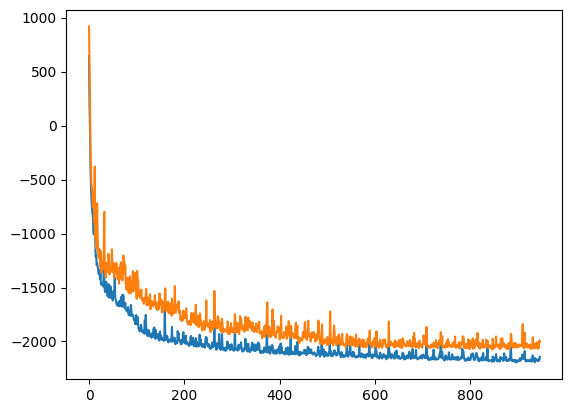

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.66633  validloss 4.85537±0.00000  bestvalidloss 4.85537  last_update 0
train: iter 1  trainloss 4.30226  validloss 4.44165±0.00000  bestvalidloss 4.44165  last_update 0
train: iter 2  trainloss 3.98751  validloss 4.11872±0.00000  bestvalidloss 4.11872  last_update 0
train: iter 3  trainloss 3.73411  validloss 3.83494±0.00000  bestvalidloss 3.83494  last_update 0
train: iter 4  trainloss 3.51169  validloss 3.59657±0.00000  bestvalidloss 3.59657  last_update 0
train: iter 5  trainloss 3.31457  validloss 3.40007±0.00000  bestvalidloss 3.40007  last_update 0
train: iter 6  trainloss 3.15500  validloss 3.21392±0.00000  bestvalidloss 3.21392  last_update 0
train: iter 7  trainloss 3.01282  validloss 3.06445±0.00000  bestvalidloss 3.06445  last_update 0
train: iter 8  trainloss 2.88658  validloss 2.92705±0.00000  bestvalidloss 2.92705  last_update 0
train: iter 9  trainloss 2.76818  validloss 2.80436±0.00000  bestvalidloss 2.80436  last_update 0
train: iter 10  trai

train: iter 95  trainloss -1.08825  validloss -1.32806±0.00000  bestvalidloss -1.33197  last_update 1
train: iter 96  trainloss -1.14189  validloss -1.39154±0.00000  bestvalidloss -1.39154  last_update 0
train: iter 97  trainloss -1.14887  validloss -1.34206±0.00000  bestvalidloss -1.39154  last_update 1
train: iter 98  trainloss -1.16007  validloss -1.36999±0.00000  bestvalidloss -1.39154  last_update 2
train: iter 99  trainloss -1.17302  validloss -1.48219±0.00000  bestvalidloss -1.48219  last_update 0
train: iter 100  trainloss -1.16684  validloss -1.44080±0.00000  bestvalidloss -1.48219  last_update 1
train: iter 101  trainloss -1.18486  validloss -1.40949±0.00000  bestvalidloss -1.48219  last_update 2
train: iter 102  trainloss -1.15643  validloss -1.42497±0.00000  bestvalidloss -1.48219  last_update 3
train: iter 103  trainloss -1.21348  validloss -1.49715±0.00000  bestvalidloss -1.49715  last_update 0
train: iter 104  trainloss -1.19834  validloss -1.49607±0.00000  bestvalidloss

train: iter 180  trainloss -1.27436  validloss -1.60326±0.00000  bestvalidloss -1.70617  last_update 16
train: iter 181  trainloss -1.28809  validloss -1.61669±0.00000  bestvalidloss -1.70617  last_update 17
train: iter 182  trainloss -1.25721  validloss -1.62204±0.00000  bestvalidloss -1.70617  last_update 18
train: iter 183  trainloss -1.24788  validloss -1.65876±0.00000  bestvalidloss -1.70617  last_update 19
train: iter 184  trainloss -1.26335  validloss -1.62314±0.00000  bestvalidloss -1.70617  last_update 20
train: iter 185  trainloss -1.27120  validloss -1.52070±0.00000  bestvalidloss -1.70617  last_update 21
train: iter 186  trainloss -1.27790  validloss -1.53058±0.00000  bestvalidloss -1.70617  last_update 22
train: iter 187  trainloss -1.28196  validloss -1.66726±0.00000  bestvalidloss -1.70617  last_update 23
train: iter 188  trainloss -1.26811  validloss -1.57524±0.00000  bestvalidloss -1.70617  last_update 24
train: iter 189  trainloss -1.25589  validloss -1.49128±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-0.3397, -2.4293, -2.6460, -5.5429], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 110.14550  validloss 110.28274±0.00000  bestvalidloss 110.28274  last_update 0
train: iter 1  trainloss 81.84276  validloss 86.77912±0.00000  bestvalidloss 86.77912  last_update 0
train: iter 2  trainloss 59.78473  validloss 60.05809±0.00000  bestvalidloss 60.05809  last_update 0
train: iter 3  trainloss 46.75796  validloss 45.09714±0.00000  bestvalidloss 45.09714  last_update 0
train: iter 4  trainloss 37.10675  validloss 35.24743±0.00000  bestvalidloss 35.24743  last_update 0
train: iter 5  trainloss 29.26794  validloss 27.52791±0.00000  bestvalidloss 27.52791  last_update 0
train: iter 6  trainloss 23.19252  validloss 21.67563±0.00000  bestvalidloss 21.67563  last_update 0
train: iter 7  trainloss 18.48563  validloss 16.78290±0.00000  bestvalidloss 16.78290  last_update 0
train: iter 8  trainloss 14.61096  validloss 13.09779±0.00000  bestvalidloss 13.09779  last_update 0
train: iter 9  trainloss 11.47013  validloss 10.33539±0.00000  bestvalidloss 10.33539  l

train: iter 83  trainloss 1.09652  validloss 2.61431±0.00000  bestvalidloss 2.35452  last_update 10
train: iter 84  trainloss 1.06646  validloss 2.44215±0.00000  bestvalidloss 2.35452  last_update 11
train: iter 85  trainloss 1.07447  validloss 2.44255±0.00000  bestvalidloss 2.35452  last_update 12
train: iter 86  trainloss 1.05979  validloss 2.57544±0.00000  bestvalidloss 2.35452  last_update 13
train: iter 87  trainloss 1.08437  validloss 2.55892±0.00000  bestvalidloss 2.35452  last_update 14
train: iter 88  trainloss 1.07194  validloss 2.46484±0.00000  bestvalidloss 2.35452  last_update 15
train: iter 89  trainloss 1.07946  validloss 2.64614±0.00000  bestvalidloss 2.35452  last_update 16
train: iter 90  trainloss 1.07450  validloss 2.58346±0.00000  bestvalidloss 2.35452  last_update 17
train: iter 91  trainloss 1.06193  validloss 2.58589±0.00000  bestvalidloss 2.35452  last_update 18
train: iter 92  trainloss 1.07786  validloss 2.60647±0.00000  bestvalidloss 2.35452  last_update 19


train: iter 165  trainloss 1.04079  validloss 2.51094±0.00000  bestvalidloss 2.27473  last_update 28
train: iter 166  trainloss 1.04031  validloss 2.68847±0.00000  bestvalidloss 2.27473  last_update 29
train: iter 167  trainloss 1.03055  validloss 2.59348±0.00000  bestvalidloss 2.27473  last_update 30
train: iter 168  trainloss 1.03368  validloss 2.50337±0.00000  bestvalidloss 2.27473  last_update 31
train: iter 169  trainloss 1.04427  validloss 2.72649±0.00000  bestvalidloss 2.27473  last_update 32
train: iter 170  trainloss 1.03442  validloss 2.79438±0.00000  bestvalidloss 2.27473  last_update 33
train: iter 171  trainloss 1.02556  validloss 2.53903±0.00000  bestvalidloss 2.27473  last_update 34
train: iter 172  trainloss 1.03130  validloss 2.50764±0.00000  bestvalidloss 2.27473  last_update 35
train: iter 173  trainloss 1.00893  validloss 2.76040±0.00000  bestvalidloss 2.27473  last_update 36
train: iter 174  trainloss 1.02356  validloss 2.53887±0.00000  bestvalidloss 2.27473  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-10.9579)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(6.7339)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.2757576564829165
tensor([1.3300])
